<a href="https://colab.research.google.com/github/munyanza/house_price_model/blob/main/house_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
# Pandas for data manipulation
# Matplotlib and Seaborn for data visualization

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn for model creation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Algorithms for data training
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Used for accuracy evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load the data
df = pd.read_csv('/content/housing_price_dataset.csv')

# Remove rows with negative house prices
df = df[df['Price'] >= 0]

In [ ]:
# First 5 rows
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49978 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    49978 non-null  int64  
 1   Bedrooms      49978 non-null  int64  
 2   Bathrooms     49978 non-null  int64  
 3   Neighborhood  49978 non-null  object 
 4   YearBuilt     49978 non-null  int64  
 5   Price         49978 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.7+ MB


In [ ]:
# Description

df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960
std,575.350298,1.116325,0.815859,20.718407,75995.682992
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [ ]:
# Missing values

df.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [ ]:
# Columns and rows

df.shape

(49978, 6)

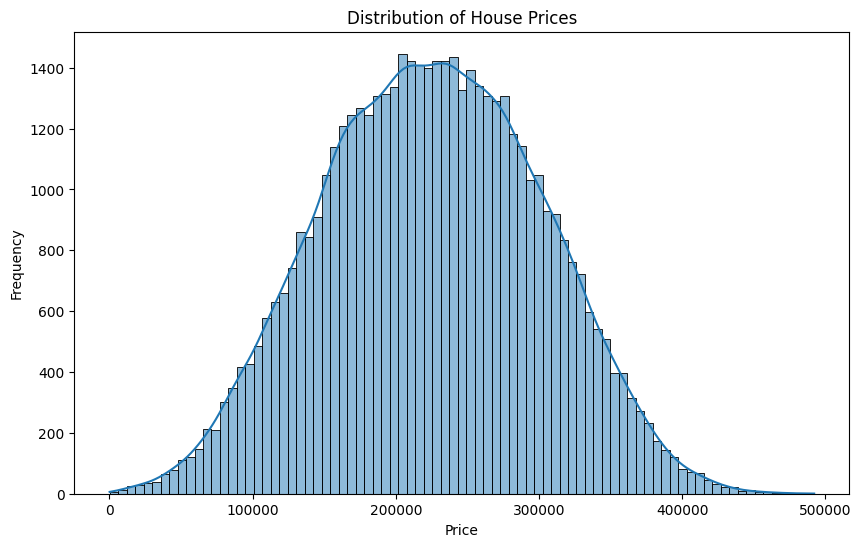

In [ ]:
# Histogram of prices
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, ax=ax)
ax.set_title('Distribution of House Prices')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

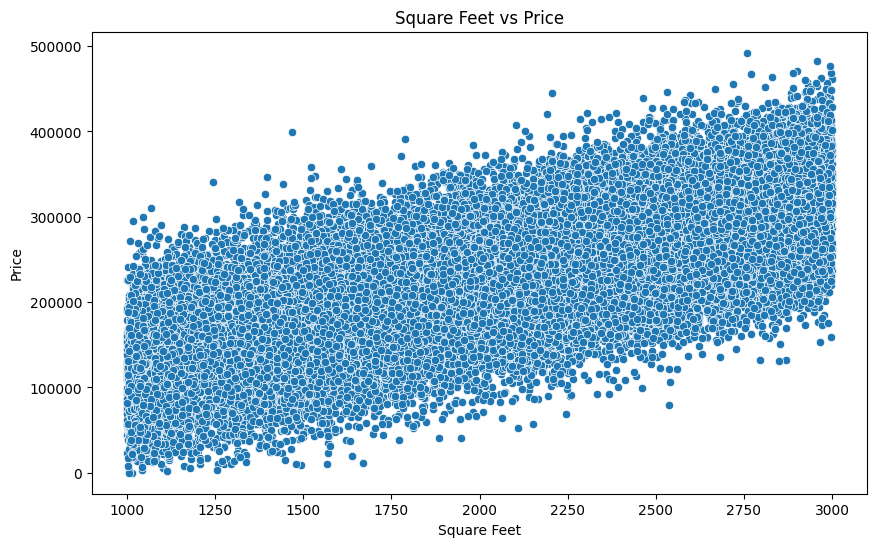

In [ ]:
# Scatter plot of SquareFeet vs Price
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='SquareFeet', y='Price', data=df, ax=ax)
ax.set_title('Square Feet vs Price')
ax.set_xlabel('Square Feet')
ax.set_ylabel('Price')
plt.show()

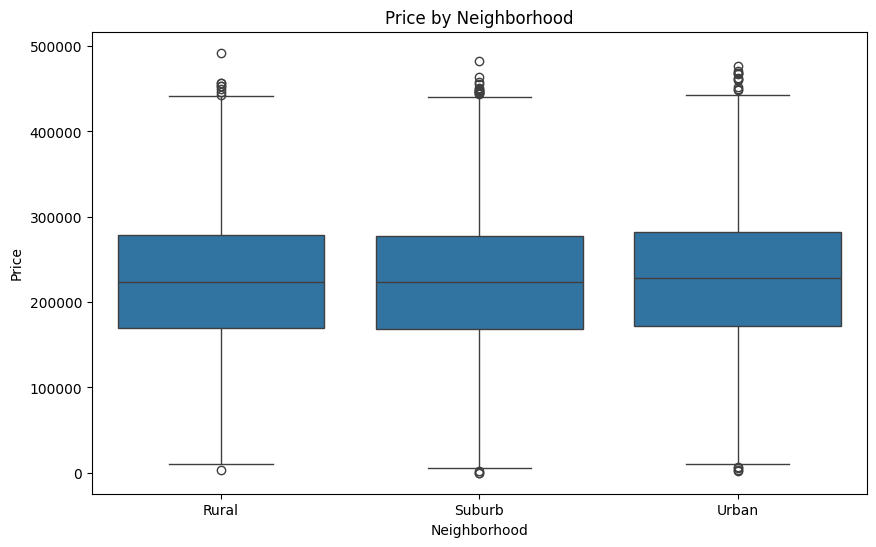

In [ ]:
# Box plot of Price by Neighborhood
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='Price', data=df, ax=ax)
ax.set_title('Price by Neighborhood')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Price')
plt.show()

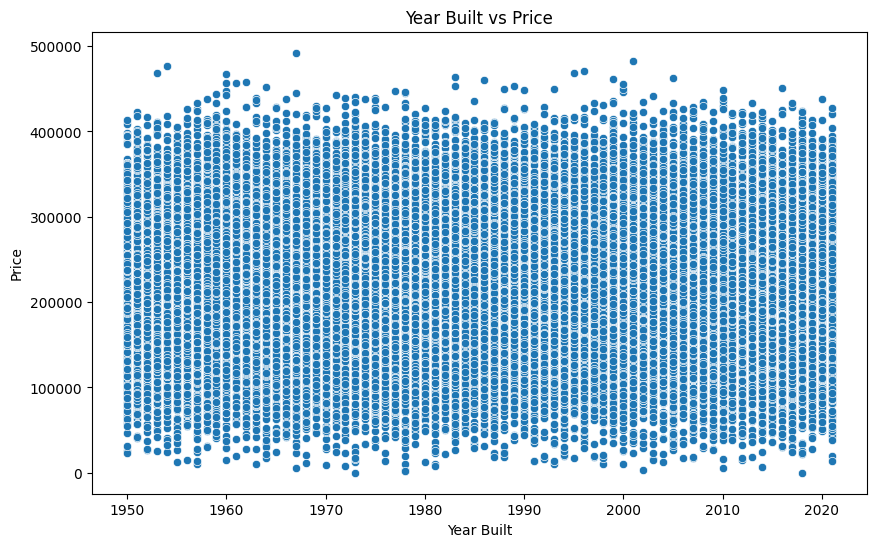

In [ ]:
# Scatter plot of YearBuilt vs Price
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='Price', data=df, ax=ax)
ax.set_title('Year Built vs Price')
ax.set_xlabel('Year Built')
ax.set_ylabel('Price')
plt.show()

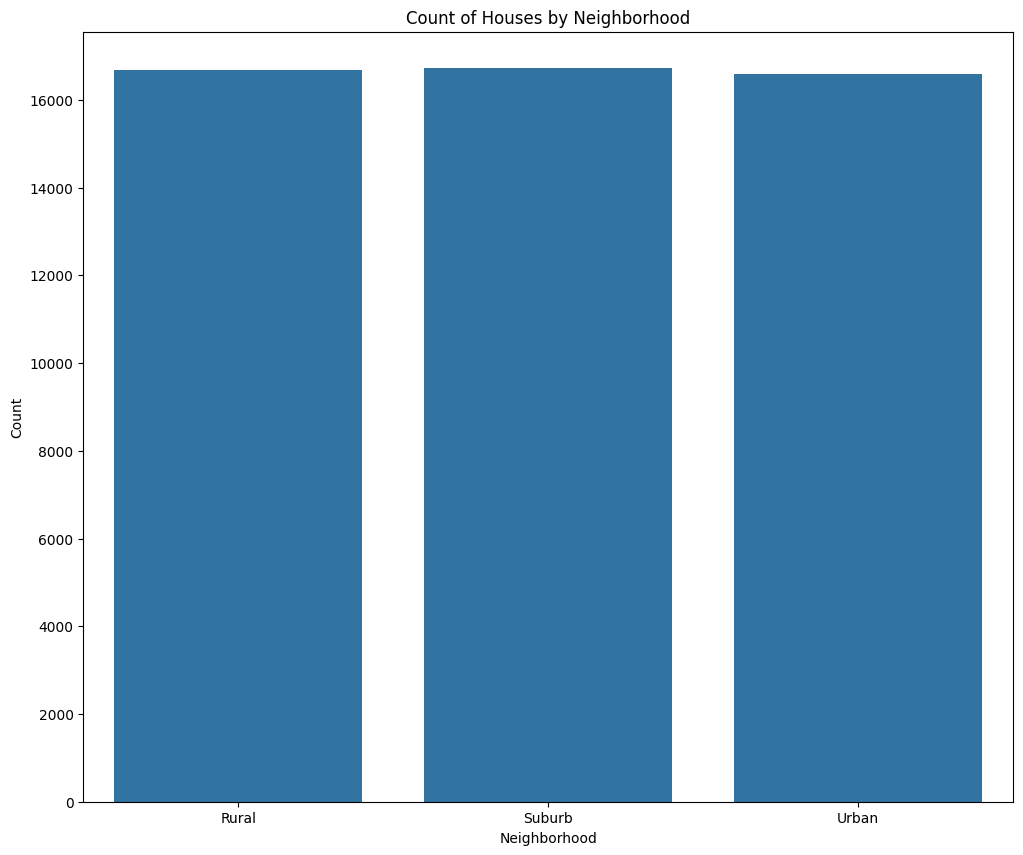

In [ ]:
# Countplot for neighborhood
plt.figure(figsize=[12,10])
sns.countplot(x='Neighborhood', data=df)
plt.title('Count of Houses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(['Price'],axis=1)
y = df['Price']

In [ ]:
# Split the data into categorical and numerical columns

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print(categorical_cols)
print(numerical_cols)

Index(['Neighborhood'], dtype='object')
Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt'], dtype='object')


In [ ]:
# Transform the categorical and numerical columns

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Preprocess the columns

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

In [ ]:
# Train the models

model = {
    'Tree':DecisionTreeRegressor(max_depth=10, min_samples_split=5),
    'Forest':RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5),
    'Xgboost':XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
}

for name,regressor in model.items():
  regressor.fit(X_train,y_train)
  y_pred = regressor.predict(X_test)
  r2 = r2_score(y_pred, y_test)
  print(f'{name} prediction is {r2*100:.2f}%')

Tree prediction is 23.80%
Forest prediction is 25.79%
Xgboost prediction is 26.10%
